In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
bankruptcy_dataset = pd.read_csv(r'C:\Users\Виталий\PycharmProjects\midterm_project\data.csv')
bankruptcy_dataset.columns = bankruptcy_dataset.columns.str.replace('?', '')
bankruptcy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Check missing values

In [3]:
bankruptcy_dataset.isna().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
bankruptcy_dataset.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Check values for unique data and delete this columns

In [5]:
for column in bankruptcy_dataset.columns:
    if bankruptcy_dataset[column].nunique() == 1:
        print(column)
        bankruptcy_dataset.drop(column, axis= 1 , inplace= True )

 Net Income Flag


In [6]:
bankruptcy_dataset.nunique()

Bankrupt                                                       2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Net Income to Stockholder's Equity                         6819
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6240
 Interest Coverage Ratio (Interest expense to EBIT)         6240
 Equity to Liability                                        6819
Length: 95, dtype: int64

In [7]:
bankruptcy_dataset['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt')

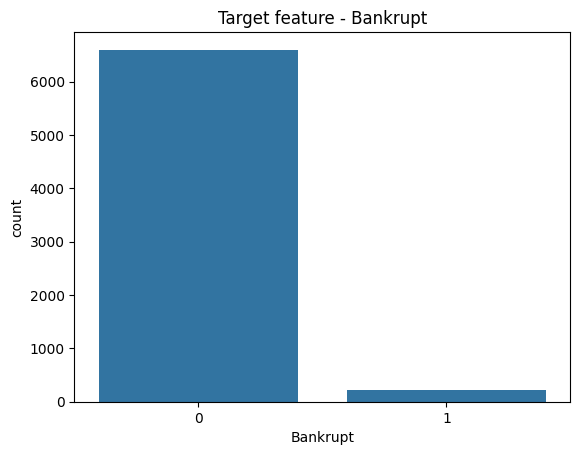

In [8]:
sns.countplot(x=bankruptcy_dataset['Bankrupt'])
plt.title('Target feature - Bankrupt')

## Try without oversampling and select 10 best features

In [9]:
X=bankruptcy_dataset.drop(labels=['Bankrupt'], axis=1)
y=bankruptcy_dataset['Bankrupt']

feature_selection = SelectKBest(f_classif,k=10).fit(X,y)
print(feature_selection.get_feature_names_out())
selected_features = X.columns[feature_selection.get_support()]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

dv = DictVectorizer(sparse=False)
train_dict = X_train[selected_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_test[selected_features].to_dict(orient='records')
X_test = dv.transform(val_dict)

[' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax'
 ' ROA(B) before interest and depreciation after tax'
 ' Persistent EPS in the Last Four Seasons'
 ' Per Share Net profit before tax (Yuan ¥)' ' Debt ratio %'
 ' Net worth/Assets' ' Net profit before tax/Paid-in capital'
 ' Retained Earnings to Total Assets' ' Net Income to Total Assets']


## Try different parameters for LogisticRegression

In [10]:
C_list = [0.01, 0.1, 1, 10]
for C in C_list:
    model = LogisticRegression(solver='liblinear', C=C, random_state=42)
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)
    print(C, accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

0.01 0.967741935483871
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

0.1 0.967741935483871
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.00      0.00      0.00        55

    accuracy                           0.97      1705
   macro avg       0.48      0.50      0.49      1705
weighted avg       0.94      0.97      0.95      1705

1 0.9689149560117302
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1650
           1       0.60      0.11      0.18        55

    accuracy                           0.97      1705
   macro avg       0.79      0.55      0.58      1705
weighted

C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Виталий\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

We have bad metrics for failed businesses. This is because the data is not balanced. We will try to supplement the data so that it is balanced.

## Try with oversampling

In [11]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

<Axes: xlabel='Bankrupt', ylabel='count'>

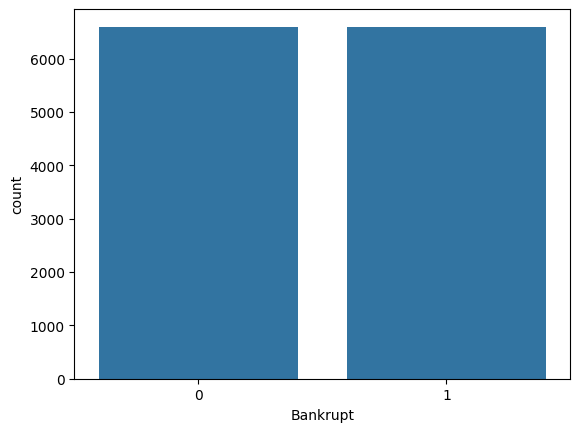

In [12]:
sns.countplot(x=y)

In [13]:
feature_selection=SelectKBest(f_classif,k=10).fit(X,y)
print(feature_selection.get_feature_names_out())

selected_features=X.columns[feature_selection.get_support()]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

dv = DictVectorizer(sparse=False)
train_dict = X_train[selected_features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_test[selected_features].to_dict(orient='records')
X_test = dv.transform(val_dict)

[' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax'
 ' ROA(B) before interest and depreciation after tax'
 ' Net Value Per Share (B)' ' Persistent EPS in the Last Four Seasons'
 ' Per Share Net profit before tax (Yuan ¥)' ' Debt ratio %'
 ' Net worth/Assets' ' Net profit before tax/Paid-in capital'
 ' Net Income to Total Assets']


In [14]:
C_list = [0.01, 0.1, 1, 10, 20]
for C in C_list:
    model = LogisticRegression(solver='liblinear', C=C, random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    print(C, accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

0.01 0.8457575757575757
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1656
           1       0.91      0.77      0.83      1644

    accuracy                           0.85      3300
   macro avg       0.85      0.85      0.84      3300
weighted avg       0.85      0.85      0.84      3300

0.1 0.873030303030303
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1656
           1       0.87      0.88      0.87      1644

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300

1 0.8803030303030303
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1656
           1       0.87      0.90      0.88      1644

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighte

## Chose model with best parameters and save it (C=10)

In [15]:
model = LogisticRegression(solver='liblinear', C=20, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8818181818181818
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1656
           1       0.87      0.90      0.88      1644

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



In [16]:
output_file = f'model_C={20}.bin'

In [17]:
output_file

'model_C=20.bin'

In [18]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

## Try RandomforestRegression with different n_estimators

In [27]:
from tqdm import tqdm

In [28]:
for n in tqdm(range(10, 201, 10)):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    print(n, accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

 10%|████████▎                                                                          | 2/20 [00:00<00:02,  6.87it/s]

10 0.9296969696969697
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1656
           1       0.92      0.94      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300

20 0.926060606060606
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 15%|████████████▍                                                                      | 3/20 [00:00<00:02,  6.03it/s]

30 0.9257575757575758
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 20%|████████████████▌                                                                  | 4/20 [00:00<00:03,  4.90it/s]

40 0.9281818181818182
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 25%|████████████████████▊                                                              | 5/20 [00:01<00:03,  4.09it/s]

50 0.9287878787878788
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 30%|████████████████████████▉                                                          | 6/20 [00:01<00:04,  3.47it/s]

60 0.9290909090909091
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 35%|█████████████████████████████                                                      | 7/20 [00:01<00:04,  2.97it/s]

70 0.93
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.96      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 40%|█████████████████████████████████▏                                                 | 8/20 [00:02<00:04,  2.68it/s]

80 0.9293939393939394
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 45%|█████████████████████████████████████▎                                             | 9/20 [00:02<00:04,  2.42it/s]

90 0.9287878787878788
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 50%|█████████████████████████████████████████                                         | 10/20 [00:03<00:04,  2.23it/s]

100 0.9287878787878788
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 55%|█████████████████████████████████████████████                                     | 11/20 [00:03<00:04,  2.01it/s]

110 0.9278787878787879
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:04<00:04,  1.88it/s]

120 0.9284848484848485
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:05<00:03,  1.77it/s]

130 0.9278787878787879
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:05<00:03,  1.66it/s]

140 0.9278787878787879
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:06<00:03,  1.54it/s]

150 0.9278787878787879
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:07<00:02,  1.44it/s]

160 0.9287878787878788
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:08<00:02,  1.36it/s]

170 0.9284848484848485
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:09<00:01,  1.29it/s]

180 0.9287878787878788
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:10<00:00,  1.22it/s]

190 0.9272727272727272
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.81it/s]

200 0.9272727272727272
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1656
           1       0.91      0.95      0.93      1644

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300



In [29]:
rf

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=1)

In [30]:
output_file = f'model_rf_n={200}.bin'

In [31]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()